Discount and profit analyis

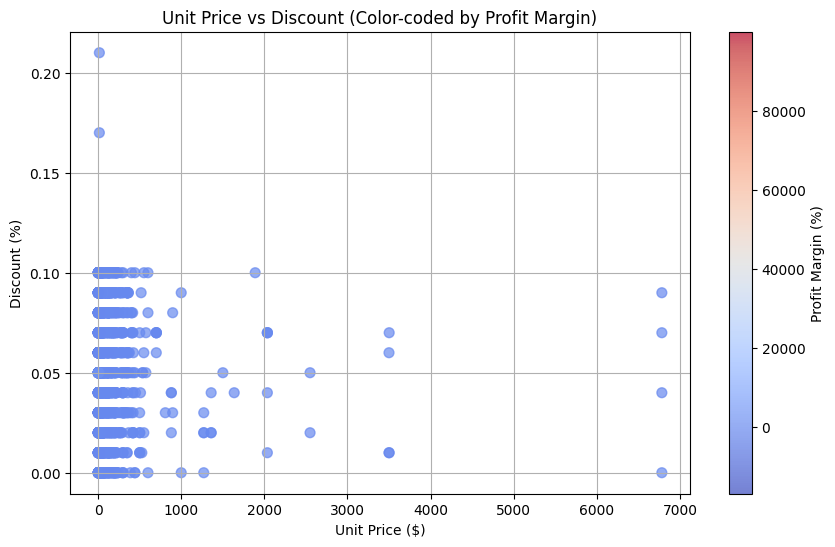

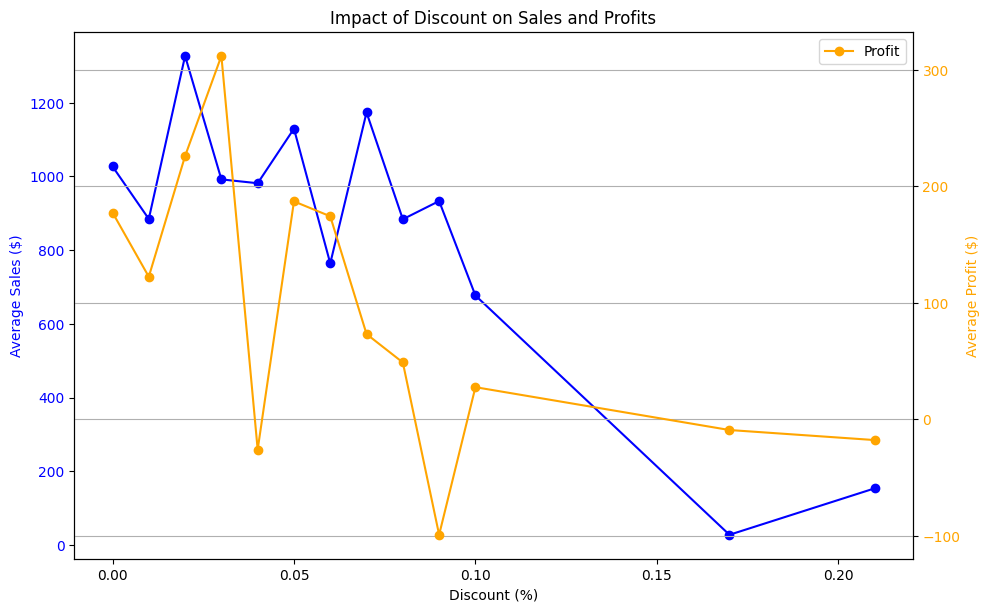

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('StoreUS-2015.csv')

# Step 1: Calculate Profit Margin (Profit as a percentage of Sales)
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Step 2: Analyze the impact of Discounts on Sales and Profits
# Group by Discount and calculate the average Sales, Profit, and Profit Margin
discount_analysis = data.groupby('Discount').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Step 3: Visualize the relationship between Unit Prices, Discounts, and Profit Margins
plt.figure(figsize=(10, 6))

# Scatter plot of Unit Price vs Discount, color-coded by Profit Margin
plt.scatter(data['Unit Price'], data['Discount'], c=data['Profit Margin'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Profit Margin (%)')
plt.title('Unit Price vs Discount (Color-coded by Profit Margin)')
plt.xlabel('Unit Price ($)')
plt.ylabel('Discount (%)')
plt.grid(True)
plt.show()

# Step 4: Plot the impact of Discounts on Sales and Profits
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales and Profit on the same chart with different axes
ax1.set_xlabel('Discount (%)')
ax1.set_ylabel('Average Sales ($)', color='blue')
ax1.plot(discount_analysis['Discount'], discount_analysis['Sales'], color='blue', label='Sales', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit
ax2 = ax1.twinx()
ax2.set_ylabel('Average Profit ($)', color='orange')
ax2.plot(discount_analysis['Discount'], discount_analysis['Profit'], color='orange', label='Profit', marker='o')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Impact of Discount on Sales and Profits')
plt.legend()
plt.grid(True)
plt.show()
